In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Salaries.csv')
df.head()

C:\Users\Noura Aboelsoud\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (3,4,5,6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


In [4]:
# DtypeWarning: Columns (3,4,5,6,12) 
# convert columns to numric instead of object

df['BasePay'] = pd.to_numeric(df['BasePay'],errors='coerce')
df['OvertimePay'] = pd.to_numeric(df['OvertimePay'],errors='coerce')
df['OtherPay'] = pd.to_numeric(df['OtherPay'],errors='coerce')
df['Benefits'] = pd.to_numeric(df['Benefits'],errors='coerce')

df['Year'] = pd.to_datetime(df.Year, format='%Y')
df['Year'] = df['Year'].dt.year


df['JobTitle'] = df['JobTitle'].astype('string')
df.JobTitle=df.JobTitle.apply(lambda r:r.lower())

In [5]:
# missing values
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
dtype: int64

In [6]:
df.Agency.unique()

array(['San Francisco'], dtype=object)

In [7]:
# ['Notes', 'Status'] columns is full of missing values
df.drop(columns = ['Id','Notes','Status'], inplace=True)


In [8]:
# check duplicate values
df.duplicated().sum()

3

In [9]:
df.drop_duplicates()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,NATHANIEL FORD,general manager-metropolitan transit authority,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,San Francisco
1,GARY JIMENEZ,captain iii (police department),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,San Francisco
2,ALBERT PARDINI,captain iii (police department),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,San Francisco
3,CHRISTOPHER CHONG,wire rope cable maintenance mechanic,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,San Francisco
4,PATRICK GARDNER,"deputy chief of department,(fire department)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,San Francisco
...,...,...,...,...,...,...,...,...,...,...
148646,Not provided,not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,San Francisco
148647,Joann Anderson,communications dispatcher 2,0.00,0.00,0.00,0.0,0.00,0.00,2014,San Francisco
148648,Leon Walker,custodian,0.00,0.00,0.00,0.0,0.00,0.00,2014,San Francisco
148649,Roy I Tillery,custodian,0.00,0.00,0.00,0.0,0.00,0.00,2014,San Francisco


In [10]:
# missing values
df.isnull().sum()

EmployeeName            0
JobTitle                0
BasePay               609
OvertimePay             4
OtherPay                4
Benefits            36163
TotalPay                0
TotalPayBenefits        0
Year                    0
Agency                  0
dtype: int64

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BasePay,148045.0,66325.448841,42764.635495,-166.01,33588.200,65007.45,94691.050,319275.01
OvertimePay,148650.0,5066.059886,11454.380559,-0.01,0.000,0.00,4658.175,245131.88
OtherPay,148650.0,3648.767297,8056.601866,-7058.59,0.000,811.27,4236.065,400184.25
Benefits,112491.0,25007.893151,15402.215858,-33.89,11535.395,28628.62,35566.855,96570.66
TotalPay,148654.0,74768.321972,50517.005274,-618.13,36168.995,71426.61,105839.135,567595.43
TotalPayBenefits,148654.0,93692.554811,62793.533483,-618.13,44065.650,92404.09,132876.450,567595.43
Year,148654.0,2012.522643,1.117538,2011.00,2012.000,2013.00,2014.000,2014.00


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      148654 non-null  object 
 1   JobTitle          148654 non-null  object 
 2   BasePay           148045 non-null  float64
 3   OvertimePay       148650 non-null  float64
 4   OtherPay          148650 non-null  float64
 5   Benefits          112491 non-null  float64
 6   TotalPay          148654 non-null  float64
 7   TotalPayBenefits  148654 non-null  float64
 8   Year              148654 non-null  int64  
 9   Agency            148654 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 11.3+ MB


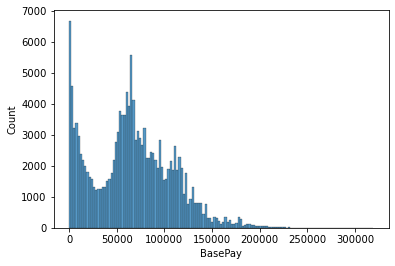

In [13]:
sns.histplot(df['BasePay']);
# plt.xlim(0,2000)

In [14]:
# Incorrect records
df[df.BasePay <= 0].BasePay.count()

1309

In [15]:
avgBasePayPerTiTel=df.groupby('JobTitle')['BasePay'].mean()

# The number of missing values in BasePay is relatively few fill with avarage of same title

for i in df[(df.BasePay <= 0 ) |(df.BasePay.isna())]['BasePay'].index:
    df.BasePay[i]=avgBasePayPerTiTel[df.JobTitle[i]]

C:\Users\NOURAA~1\AppData\Local\Temp/ipykernel_15260/949204408.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.BasePay[i]=avgBasePayPerTiTel[df.JobTitle[i]]


In [16]:
df.drop(df[df.BasePay <= 0].index,inplace=True)

# drop nan in BasePay ,OvertimePay and  OtherPay
df.dropna(subset=['BasePay'],inplace=True)
df.dropna(subset=['OvertimePay'],inplace=True)
df.dropna(subset=['OtherPay'],inplace=True)


# df[(df.OvertimePay < 0 )].OvertimePay = 0.00
# df[(df.OtherPay < 0 )].OtherPay = 0.00
df.drop(df[df.OvertimePay < 0].index,inplace=True)
df.drop(df[df.OtherPay < 0].index,inplace=True)


# fill NaN in Benefits with zero
df['Benefits'] = df['Benefits'].fillna(0.00)
df.drop(df[df.Benefits < 0].index,inplace=True)


In [17]:
df.TotalPay=df.BasePay+df.OvertimePay+df.OtherPay
df.TotalPayBenefits=df.TotalPay+df.Benefits

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BasePay,148586.0,66904.278556,42388.391165,6.04,35764.2075,65200.200,94955.3000,319275.01
OvertimePay,148586.0,5068.223232,11456.371301,0.00,0.0000,0.000,4661.1500,245131.88
OtherPay,148586.0,3649.123332,8057.453183,0.00,0.0000,811.350,4237.0275,400184.25
Benefits,148586.0,18930.834528,17165.743701,0.00,0.0000,23247.885,33472.0875,96570.66
TotalPay,148586.0,75621.625120,50062.773861,15.50,39145.4525,71957.975,106246.8025,567595.43
TotalPayBenefits,148586.0,94552.459649,62199.376981,15.66,47223.1875,92865.720,133026.5000,567595.43
Year,148586.0,2012.522593,1.117599,2011.00,2012.0000,2013.000,2014.0000,2014.00


In [19]:
df.JobTitle.value_counts()          

transit operator                            9424
special nurse                               5790
registered nurse                            4955
custodian                                   3214
firefighter                                 3153
                                            ... 
powerhouse electrician supervisor ii           1
emergency protective orders commissioner       1
senior general utility mechanic                1
special assistant xv                           1
forensic toxicologist supervis                 1
Name: JobTitle, Length: 1626, dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148586 entries, 0 to 148649
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      148586 non-null  object 
 1   JobTitle          148586 non-null  object 
 2   BasePay           148586 non-null  float64
 3   OvertimePay       148586 non-null  float64
 4   OtherPay          148586 non-null  float64
 5   Benefits          148586 non-null  float64
 6   TotalPay          148586 non-null  float64
 7   TotalPayBenefits  148586 non-null  float64
 8   Year              148586 non-null  int64  
 9   Agency            148586 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 12.5+ MB


Text(0.5, 1.0, 'summarize relation between data')

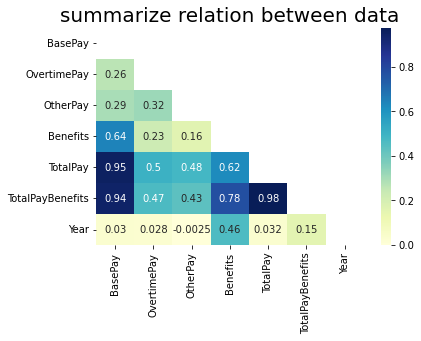

In [21]:
# summarize relation between data
mask=np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(),annot=True, mask=mask, cmap="YlGnBu")
plt.title('summarize relation between data',fontsize = 20)


In [22]:
Jobs = df['JobTitle'].value_counts().head(10)
Jobs.index

Index(['transit operator', 'special nurse', 'registered nurse', 'custodian',
       'firefighter', 'recreation leader', 'deputy sheriff',
       'public svc aide-public works', 'police officer 3',
       'patient care assistant'],
      dtype='object')

Text(0.5, 1.0, 'Percentage of employees scattered in these Jobs')

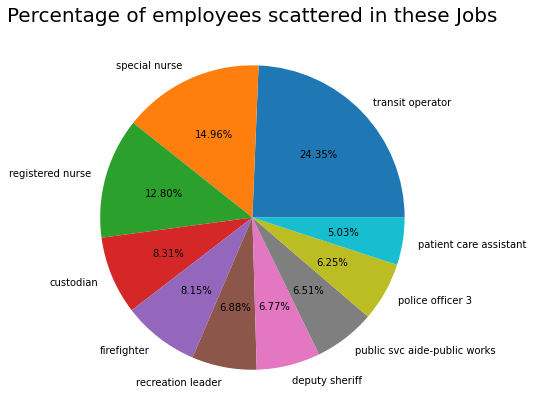

In [23]:
#  What are the most common job?
Jobs = df['JobTitle'].value_counts().head(10)
plt.figure(figsize = (10, 7))
plt.pie(Jobs,labels= Jobs.index, autopct = "%.2f%%")
plt.title('Percentage of employees scattered in these Jobs',fontsize = 20)


In [24]:

mostslaray =df.sort_values(by=['TotalPay'],ascending=False)[['JobTitle','TotalPay']].head(5)
mostslaray
#sns.scatterplot(data=mostslaray, x="JobTitle", y="TotalPay")
# plt.xticks(rotation = 90)


,JobTitle,TotalPay
0,general manager-metropolitan transit authority,567595.430
1,captain iii (police department),538909.280
110531,deputy chief 3,471952.640
110532,asst med examiner,390111.980
81391,deputy chief 3,372074.695


<AxesSubplot:xlabel='JobTitle'>

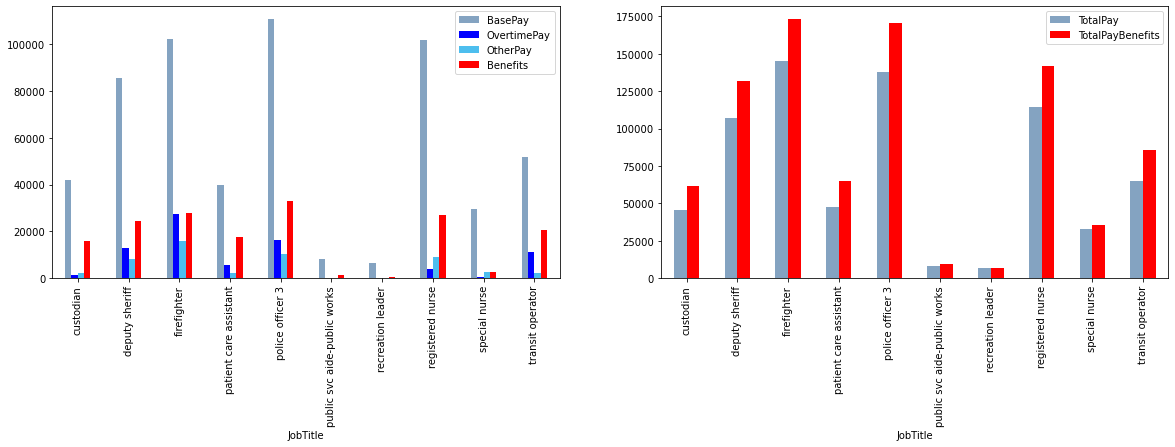

In [25]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(20,5))
color=(0.2, 0.4, 0.6, 0.6)
# Salaries description based on most common jobs
job=list(Jobs.index)
df[df['JobTitle'].isin(job)].groupby('JobTitle')[['BasePay','OvertimePay','OtherPay','Benefits']].mean().plot(kind="bar",color=[color,'b','#4DBEEE','red'], ax = axis1)
df[df['JobTitle'].isin(job)].groupby('JobTitle',sort=True)[['TotalPay','TotalPayBenefits']].mean().plot(kind="bar",color=[color,'red'], ax = axis2)


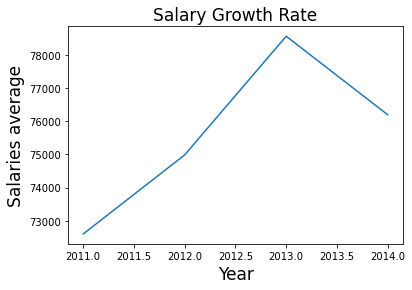

In [26]:
# What is the base salary growth rate each year?
df.groupby('Year')['TotalPay'].mean().plot()

plt.title('Salary Growth Rate',fontsize = 17 );
plt.xlabel('Year' ,fontsize = 17 )
plt.ylabel('Salaries average' ,fontsize = 17);

# There was an increase in average salaries from 2011 (average 63504.192) to 2013 (average 68434.485) 
# until it decreased in 2014 to (65583.305)

<AxesSubplot:title={'center':'salaries changed over time between different groups of people'}, xlabel='Year', ylabel='TotalPay'>

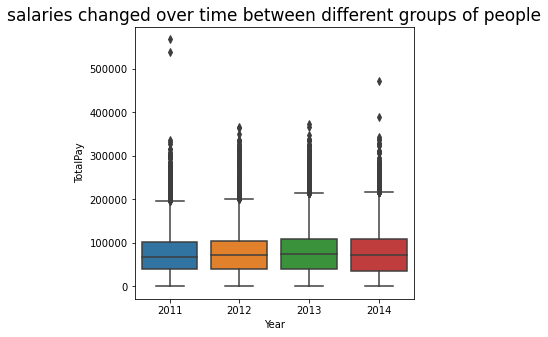

In [27]:
plt.figure(figsize = (5, 5))
plt.title('salaries changed over time between different groups of people',fontsize = 17 );

payperyear=df[['TotalPay','Year']]
sns.boxplot(data = payperyear, x = 'Year', y = 'TotalPay')

In [29]:
df[df['TotalPay']> 400000][['JobTitle','TotalPay']]

,JobTitle,TotalPay
0,general manager-metropolitan transit authority,567595.43
1,captain iii (police department),538909.28
110531,deputy chief 3,471952.64


<AxesSubplot:xlabel='Year', ylabel='TotalPay'>

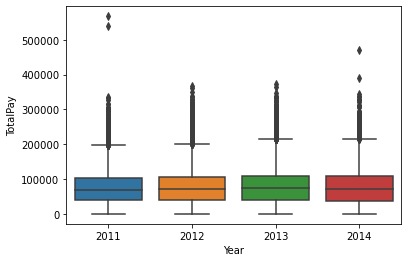

In [32]:
Years=df.Year.unique()
# payperyear=df[df['Year']== Years[0]][['TotalPay','Year']]
payperyear=df[['TotalPay','Year']]

sns.boxplot(data = payperyear, x = 'Year', y = 'TotalPay')